<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Здесь-я-дополнительно-вывел-число-объявлений-размещенных-за-год,-для-объективности." data-toc-modified-id="Здесь-я-дополнительно-вывел-число-объявлений-размещенных-за-год,-для-объективности.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>Здесь я дополнительно вывел число объявлений размещенных за год, для объективности.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
# импортируем разные функции для реализации линейной регрессии 
# проверю два подхода: линейный и полиномиальный, проверю какой более точно предскажет
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
df.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


### Вывод

Ничего не понятно.. нужен "сепаратор"..

## Предобработка данных

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None) # здесь снимаем ограничение на вывод числа столбцов, для полной визиуалицации датафрейма
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


...так лучше.

In [5]:
# приводим к нижнему регистру локацию и проверяем на дубликаты.
df['locality_name'] = df['locality_name'].str.lower()
df.duplicated().sum()

0

In [6]:
# анализ типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
df.isna().sum() # смотрим, где у нас NaNы...

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# воспользуемся методом .describe(), он нам даст полное описание столбца, сразу увидим выбивающиеся цифры.
df.describe()#value_counts()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


# Проанализируем как сами данные, так и пропуски.

1. last_pric - цена квартиры указана в рублях, далее приведем ее в тысячи руб., для удобства чтения и восприятия.


2. total_area - отлично, пропусков нет, есть правда квартиры по 900 кв.м, но медиана и средняя прекрасно дают представление о рынке квартир. Выбивающиеся значения необходимо будет почистить.


3. rooms - 19 комнат это похоже норма для "квартир" на 900 квадратов, но для средней квартиры это многовато... уберем лишнее. Есть квартиры с 0-лём комнат, при детальном анализе увидим, что это гостинки/студии/открытая планировка и таких объектов всего 197. Переведем их в полноценную квартиру с 1 комнатой. "Погрешность" менее 1% должна не сильно повлиять на результат.


4. ceiling_height - высота потолков. Данные отсутвуют ~ в 30% случах. Это много, но высота потолков это не тот параметр о котором будет первым делом спрашивать покупатель, да и в исcледовании, им не отводиться особо важной роли. Поэтому смело заполним пропуски медианным значением этого столбца.Откровенно выбивающиеся из здравого смыла значения (высота 1 метр/ 100 метров, 20+ метров...) приведем к реальным. Здесь явно была ошибка ввода, например вместо 2.7 метра указали 27 и т.п. .


5. floors_total - всего этажей в доме. Таких пропусков всего 0,4%, можем смело заполнить их этажом (floor) квартиры, благо по данному столбцу пропусков нет.


6. living_area - жилая площадь в квадратных метрах. Число пропусков 1903 (~1%), хоть их и не много, но это один из ключевых параметров в стоимости квартиры. Там где есть площадь кухни, заполним жил.пл. как разность общая площадь - площадь кухни. После проверим число пропусков, если снизиться до 0,7-0,8%, то остальные пропуски заполним значением из общей площади.


7. is_apartment - апартаменты. Почти 21000 пропусков(из 23699). Признак апартаменты указан как "истина" в 50-ти случаях, как "ложь" в 2725 (df[df['is_apartment'] == False]['is_apartment'].count()), т.е. по крайней мере 2780 человек обратили на это поле внимание при размещении объвления.Апартаменты этот признак, который существенно вияет на стоимость жилья, как правило, по рынку, такие объекты идут дешевле, т.к. по таким объектам другие налоги,расчет комуналки, не дейтсвует Жилищный кодекс и т.п. и такую важную информацию покупатель должен знать, и указать. В данном случае свыше 20000 объявлений без этого параметра, могу предположить, что это "обычные" квартиры, владельцы которых даже "не знают", "не заморачиваются" на этот счет или данная опция появилась на сайте объявлений "не давно" и поэтому в выгрузке пристутствует большое кол-во пропусков по апртаментам. Как то идентифицировать апартаменты не вижу зацепок, заполним пропуски значением False.


8. kitchen_area - площадь кухни. Здесь действуем по аналогии с жилой площадью, сп. п.3.


9. balcony - балкон. Почти 50% пропусков... много. На первых этажах - балкон, это редкое исключение, выгрузка df[(df['balcony']==1)& (df['floor']== 1)] подтверждает это, 131 случай на 23 тыс. Таким образом, если пропуски по балконам для первых этажей заменим нулями (а это почти 2000 строк), то сократим неопределенность до 8-9 тыс. 
А вот что делать с квартирами где балконов больше 3, 4 и да, есть где их даже 5-ть штук (таких 304 квартиры! ), и это при том ,что 5-ть балконов встречаются у квартир площадью всего 45-50 кв. метров! Здесь явно ошибка, которая закралась или в момент формирование объявления, либо при выгрузке df. Есть предположение, что 3,4,5 это не кол-во балконов, а их(его) метраж. В любом случае, с точки зрения покупателя наиболее ценный фактор, это само наличие балкона, а не то что их 2 или 3... А точнее не так: Условно, если балкон есть, то да, я готов накинуть за него дополнительно 100тыс руб. к стоимости квартиры, а если есть второй балкон, то за эту избыточность, я уже не готов 100 тыс накинуть, а готов накинуть уже условно 50 т.р.. Т.е. сам фактор наличия балкона имеет **БОЛЕЕ** высокий вес, чем фактор наличия 2-го балкона и тем более 3-го и т.д.. Резюмируя, предлагаю, все балконы в кол-ве более 2 и более на квартиру приравнять к 2.


10. locality_name - название населённого пункта неуказано в 49 случаях. Странно, не указать один из самых важных факторов влияющий на цену квартиры. "Продаю то не зная что?" Мошенники..? Конечно можно было бы заморочиться, и часть пропусков восстановить по косвенной информации, например, в отдельных случая есть расстояние до аэропорта, т.е. можно было бы соотнести аналогичные расстояние с известными локалити и заполнить часть из 49 пропусков, но в этом не вижу смысла, т.к. данная выборка составляет менее 0,2%. Дропнем ее.


11. airports_nearest - здесь ничего выдумывать не нужно, возьмем медиану от известных расстояний_объектов - разбитым по группам "населенный пункт". Там где для полученных групп медиану установить не получиться ( будет =0), то те объекты отправим за "101 километр".. ) 


 12. cityCenters_nearest - а вот здесь если рассчитать расстояние до центра как в п.8, т.е. по медианным значениям то сформируем искуственный "пояс квартир" на медианном расстоянии от центра, а учитывая, что данных пропусков порядком 25%, то это будет существенным изменением, которое может повлиять на общую картину. Пока не придумал, как идентифицировать местоположение квартиры от центра, возможно я сгущаю краски и этот пояс квартир "размажеться по карте", в общем посмотрим, что будет получаться ...
 Да, забегая вперед,я долго не мог понять, откуда появляется всплеск по стоимости жилья на 20-м км от центра, а потом присмотревшись к данным понял. 
 Изначально я ожидал, что cityCenters_nearest это расстояние до центра у каждой конкретной локации: по Питеру свое, по Пушкин свое, по Выборгу свое... но оказалось это совсем не так, в объявлениях все расстояния до центра идут с привязкой к центру  Питера!!! А на расстоянии как раз примерно в 20 км от Питера идут города спутники со своей развитой инфраструктурой и конечно там стоимость жилья будет выше чем условно на 18-19 км от Питера в промзоне. Но об этом позже...


13. парки,пруды и т.п. здесь не будем гадать и если информации нет, то пропуски заменяем нулем. Никаих медиан и средних значений.


14. days_exposition - сколько дней было размещено объявление (от публикации до снятия), здесь видим почти 3200 пропусков, возможно на момент выгрузки df эти объявления еще были актуальны... Заменим пропуски медианным значением.



План действий есть, приступим к обработке!



In [9]:
# Сначала создадим функцию, которая будут отбрасывать выбивающиеся значения, т.е. значения которые будут выше или ниже
# межквартильного интервала. (метод describe выше очень наглядно демонстрирует это)
def deleted_trash(column,df,k1=0.01,k2=10):
    qvarta = df[column].describe()
    data_25=qvarta[4]# вытаскиваем значение равное 25%
    data_75=qvarta[6]# вытаскиваем значение равное 75%
    low_25=k1*data_25 # k1 -должно быть меньше 0 т.к. задает допустимые значения до 25%, это чтобы совсем все лишнее не отсекать
    higth_75=k2* data_75 # к2 д.б. >1  т.к. задает допустимые значения свыше 75%, чтобы совсем все лишнее не отсекать
    length = 1
    index_del= []
    for index, el in enumerate(df[column]): # перебираем индексы столбца и его значения
        if low_25 > el or higth_75 < el: # все что меньше/больше межквартильго размаха - это выбросы, мусор, который уберем
            index_del.extend(df[df[column] == el].index) # формируем индексы на удаление 
    index_del= set(index_del)
    length = len(index_del)
    print('Удалено строк: {}.'.format(length))
    df.drop(index_del,axis=0,inplace=True)

In [10]:
# 1.
df['last_price']=(df['last_price']/1_000).astype('int') # приведем цену в тысячи руб.

In [11]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [12]:
# здесь оцениваем масштаб работы для функции "очистка_мусора" 
df[df['total_area']>280]['total_area'].count()

81

Мы дома анализируем или квартиры? Думаю можно было бы удалить все что больше 150 кв.м., возможно так и сделаем,
но пока шашкой махать не будем, отсечем все что более 280 кв.м. (69.9 х 4 (коэффциент к2)  = 280кв.м)

In [13]:
#2. total_area
deleted_trash('total_area',df,0.3,4)
df['total_area']=df['total_area'].astype('int')

Удалено строк: 85.


In [14]:
# ну вот, никаких "торговых площадей" по 900 кв.метров
df['total_area'].describe()

count    23614.000000
mean        58.990472
std         29.685600
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        277.000000
Name: total_area, dtype: float64

In [15]:
# п.3 число комнат. 
# Уберем нулевые значения по комнатам, подобные квартиры в основном относятся к гостинкам/студиям и т.п.
# таких всего 196 значений, менее 1% от объема данных. Повысим им статус до однушки... 
# df[df['rooms']==0]['rooms'].count()

#df['rooms'] = df['rooms'].replace(0,1)
#df['rooms']=df['rooms'].astype('int')


In [16]:
# оставим квартиры, которые имеют менее 9 комнат
deleted_trash('rooms',df,0.1,3)

Удалено строк: 202.


In [17]:
#п.4 Высота потолков. В "плане действий" подробно расписан механизм по данному пункту, реализуем его

In [18]:
df['ceiling_height'].describe()

count    14362.000000
mean         2.766532
std          1.249106
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [19]:
def ceiling_dec(val):
    if val ==100:
        val = 2.65
    elif val >= 21:
        val = val/10
    elif (val > 5 and val < 21):
        val = 2.65
    elif (val >= 1.0 and val < 2.1):
        val = 2.1
    return val

In [20]:
df['ceiling_height'] = df['ceiling_height'].apply(ceiling_dec)

In [21]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].describe()

count    23412.000000
mean         2.694317
std          0.212273
min          2.100000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

In [22]:
#п.5 Этажность здания в котором продается квартира

Да простят меня петербуржцы, но такой жилой этажности (52,60 этажей) в Питере, а тем более в Кронштадте не было и нескоро будет (да, достраивается Лахта центр (87 этажей), но это бизнес-центр и будет окончательно запущен только в 2022году). Заменим общую этажность здания для данных случаев, этажом квартиры. Здесь всего 2 таких значения, которые превышают 37 этажей (жилых зданий выше 37 этажей в Питере нет). Обойдемся ручной заменой. 

In [23]:
df.loc[df['floors_total']>37, 'floors_total'] = df['floor']
df['floors_total'] = df['floors_total'].fillna(df['floor']).astype('int')
df['floors_total'].describe()

count    23412.000000
mean        10.632667
std          6.558552
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

# п.6 Определим жилую площадь
Сначала я хотел заполнить жилую площадь как разность общей площади квартиры минус площадь кухни(где есть), а остальные значения взять как значение общей площади. Да, грубо... Но потом решил применить линейную регрессию, нужно же когда то начинать применять машинное обучение, почему бы не здесь. Т.е. нам известны входные параметры - общая площадь, известны в 20 тыс. случаях (из 23), известны выходные параметры - жилая площадь, почему бы не найти закономерность?! "Прошу не пинать", делаю первый раз.. )) Подготовим данные: сформируем датафрейм где есть данные по столбцам общая площадь и жилая. На основе этих данных проведем обучение модели, если вероятность успеха будет выше 60% то это всяко лучше чем как я хотел сделать выше. :)

In [24]:
# предварительно уберем пропуски. Пропуски и обучение - несовместимы.
df['living_area'] = df['living_area'].fillna(0) 
# создаем ДФ по которому будем обучаться, он не содержит пропусков/нулей
df_train = df[df['living_area']!=0]
# здесь создаем ДФ на котром применим обученную модель
df_test = df[df['living_area']==0]

In [25]:
# создаем обучающие массивы, между которыми есть прямая зависимость. Ведь чем больше общая площадь, тем больше жилая...
X_train = df_train[['total_area']].values 
Y_train = df_train['living_area'].values  

In [26]:
# создаем модель линейной регрессии
model_LR = LinearRegression().fit(X_train,Y_train)

In [27]:
# это для полиномиальной... 
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
model_PF = LinearRegression().fit(X_, Y_train)

In [28]:
# точность прогнозирования, чем больше к единице, тем лучше
r_sq_LR = model_LR.score(X_train,Y_train)
r_sq_LR

0.8684038069791715

In [29]:
r_sq_PF = model_PF.score(X_,Y_train)
r_sq_PF

0.8687590789704687

In [30]:
# получаем значения на основе обучения
Y_pred_LR = model_LR.predict(X_train)
Y_pred_LR

array([64.02090417, 22.27752696, 32.09949807, ..., 33.94111765,
       32.09949807, 17.3665414 ])

А-а-а-а, 86% !!! )))
с вероятность 86% машина корректно определит (или будет близка к верному числу) жилую площадь исходя из данных по общей площади!!! Ну о таком и мечтать нельзя было... ))) Кстати методы отработали практически одинаково,похоже зависимость исключительо прямая (ниже построим график). Оставим модель от линейной регрессии. Далее возьмем данные общей площади, которые не участвовали в обучении они храняться в датафрейме df_test и по ним используя модель, вычислим уже жилую площадь по которой сейчас есть пропуски.

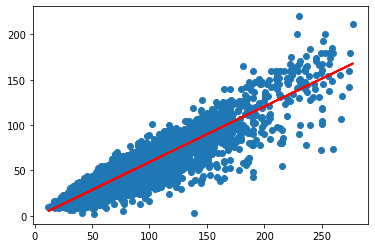

In [31]:
# линейная зависимость "на лицо"
plt.scatter(X_train, Y_train)
plt.plot(X_train, model_LR.predict(X_train), color='red', linewidth=2);

In [32]:
# теперь создадим массив входных данных по которым нужно будет найти выходные данные - жилую площадь
X_test = df_test[['total_area']].values

In [33]:
# и вычисляем используя обученную модель model_LR
Y_pred_LR = model_LR.predict(X_test)
Y_pred_LR

array([95.32843708, 41.30759598, 17.3665414 , ..., 25.34689293,
       19.20816099, 44.37696195])

In [34]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,False,False,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350,40,2018-12-04T00:00:00,1,2.65,11,18.6,1,NaN,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196,56,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900,159,2015-07-24T00:00:00,3,2.65,14,0.0,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000,100,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,False,False,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [35]:
# передаем полученные значения в основной ДФ. 
df.loc[df.living_area == 0, 'living_area'] = Y_pred_LR
df['living_area']=df['living_area'].astype('int')

In [36]:
# красота, жилая площадь заполнена!
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108,2019-03-07T00:00:00,3,2.70,16,51,8,NaN,False,False,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350,40,2018-12-04T00:00:00,1,2.65,11,18,1,NaN,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196,56,2015-08-20T00:00:00,2,2.65,5,34,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900,159,2015-07-24T00:00:00,3,2.65,14,95,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000,100,2018-06-19T00:00:00,2,3.03,14,32,13,NaN,False,False,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [37]:
# п.7 заполняем пропуски по столбцу "апартаменты"
df['is_apartment'] = df['is_apartment'].fillna(False)

In [38]:
# п.8 заполняем нулями пропуски в площади кухни 
df['kitchen_area'] = df['kitchen_area'].fillna(0)
# Далее, вычисляем площадь кухни: там где ноль кв.м.,как общая площадь минус жилая
df.loc[df.kitchen_area == 0, 'kitchen_area'] = (df['total_area']-df['living_area'])
df['kitchen_area'] = df['kitchen_area'].astype('int')


In [39]:
# п.9 Балконы. Первые этажи заполняем 0-балконов, почему так (см.выше. )
# неопределнность по балконам с 11 тыс сократилась до 5 тыс.

df.loc[(df['balcony'].isna() & df['floor'] == 1), 'balcony'] = 0
df['balcony'].isna().sum()

5103

In [40]:
# оставшиеся пропуски по балконам, заполнить просто 0 или 1, "рука не поднялась".
# решил применить машинное обучение как с жилой площадью

In [41]:
# здесь создаем ДФ на котором будем обучаться, он без пропусков!
balcony_train = df[~df['balcony'].isna()]
# здесь создаем ДФ на котором применим обученную модель
balcony_test = df[df['balcony'].isna()]
#balcony_train['balcony'].count()

In [42]:
balcony_test.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,0.0,3971.000000,3974.000000,3974.000000,1853.000000,3974.000000,2056.000000,4153.000000
mean,10.210856,6861.990986,61.410543,2.118362,2.715409,10.507153,35.110915,5.739761,12.577503,NaN,28674.260388,13201.936588,0.649220,488.868322,0.809260,512.267023,181.114375
std,5.688523,8498.043175,32.020032,1.050518,0.241543,6.589246,20.952716,4.619900,8.743627,NaN,12115.225863,8438.120406,0.821161,348.906354,0.961297,282.223742,235.874156
min,0.000000,470.000000,12.000000,1.000000,2.100000,2.000000,2.000000,2.000000,1.000000,NaN,6450.000000,329.000000,0.000000,1.000000,0.000000,16.000000,3.000000
25%,6.000000,3582.500000,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,NaN,19516.000000,7525.750000,0.000000,285.000000,0.000000,274.000000,43.000000
50%,10.000000,4950.000000,53.000000,2.000000,2.650000,9.000000,30.000000,4.000000,10.000000,NaN,26288.000000,12283.500000,0.000000,448.000000,1.000000,500.000000,90.000000
75%,14.000000,7600.000000,72.000000,3.000000,2.700000,16.000000,43.000000,8.000000,14.000000,NaN,36740.000000,15814.000000,1.000000,613.000000,1.000000,729.250000,224.000000
max,50.000000,289238.000000,263.000000,8.000000,4.500000,35.000000,220.000000,30.000000,93.000000,NaN,72713.000000,59052.000000,3.000000,2711.000000,3.000000,1313.000000,1512.000000


In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
# создаем обучающие массивы.
X_balcony_train = balcony_train[['total_area','floor','floors_total','rooms']].values 
Y_balcony_train = balcony_train['balcony'].values  

# модель линейной регрессии здесь не сработала (5%)
# LogisticRegression() тоже не показала себя (50%)
# а в вот RandomForestClassifier(n_estimators=300) прекрастно справился с задачей -  80%!!!! 
model_balcony = RandomForestClassifier(n_estimators=100).fit(X_balcony_train,Y_balcony_train)
# точность прогнозирования, чем больше к единице, тем лучше
r_sq_balcony = model_balcony.score(X_balcony_train,Y_balcony_train)
r_sq_balcony

0.8140805068545524

In [44]:
Y_pred_balcony = model_balcony.predict(X_balcony_train)
Y_pred_balcony

array([2., 1., 0., ..., 0., 2., 0.])

In [45]:
balcony_test.loc[balcony_test['balcony'].isna() , 'balcony'] = 0

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [46]:
X_test = balcony_test[['total_area','floor','floors_total','rooms']].values
Y_pred_balcony = model_balcony.predict(X_test)
Y_pred_balcony

array([2., 2., 2., ..., 1., 1., 1.])

In [47]:
df.loc[df.balcony.isna(), 'balcony'] = Y_pred_balcony
df['balcony']=df['balcony'].astype('int')

In [48]:
len(Y_pred_balcony)

5103

In [49]:
df.balcony.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: balcony, Length: 23412, dtype: bool

In [50]:
# все что больше 2-х приравняем к 2-м балконам
def balcon(val):
    if val > 2:
        val = 2
    return val
df['balcony'] = df['balcony'].apply(balcon).astype('int')

In [51]:
# п.10
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

In [52]:
# п.11 расстояние до аэропорта
df['airports_nearest'] = df['airports_nearest'].fillna(0)
dict_median = {}
dict_median = df.groupby('locality_name')['airports_nearest'].median()
print (dict_median['санкт-петербург'],dict_median['пушкин'],dict_median['выборг'])


26752.0 15766.0 0.0


In [53]:
group = df.groupby('locality_name')
df['airports_nearest'] = group.airports_nearest.apply(lambda x: x.fillna(x.median()))
df.loc[df['airports_nearest'] == 0, 'airports_nearest'] = 101000
# переведем расстояние из метров в клилометры
df['airports_nearest'] = (df['airports_nearest']/1000).astype('int')
# Выборг "ушел" за 101-й км.
df[df['locality_name']=='выборг']['airports_nearest']

69       101
97       101
253      101
294      101
320      101
        ... 
22693    101
22749    101
23215    101
23287    101
23346    101
Name: airports_nearest, Length: 237, dtype: int64

In [54]:
# п.12 расстояние до центра Питера

# Сначало заполним все пропуски - 0
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
# здесь для себя формируем и выводим для понимания, медианное расстояние до центра для групп населенных пунктов.
dict_median = {}
dict_median = df.groupby('locality_name')['cityCenters_nearest'].median()
print (dict_median['санкт-петербург'],dict_median['пушкин'],dict_median['колпино'],dict_median['петергоф'])

12241.0 27920.0 32018.0 33771.0


Вот! Это то о чем я говорил выше. Во всей выборке идет привязка именно к центру города Санкт-Петербург, а не как
в описании данных :

**•	cityCenters_nearest — расстояние до центра города (м).**


Ну теперь я могу с чичтой совестью, объекты по которым нет информации о расстоянии до центра, заполнить медианным значением со ВСЕЙ выборки.

In [55]:
df.loc[df['cityCenters_nearest'] == 0, 'cityCenters_nearest'] = df['cityCenters_nearest'].median()
print (df['cityCenters_nearest'].median())
# переведем расстояние из метров в клилометры
df['cityCenters_nearest'] = (df['cityCenters_nearest']/1000).astype('int')

11285.0


In [56]:
# п.13 парки, озера.... все что Nan то Ноль. 
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')
df['parks_nearest'] = df['parks_nearest'].fillna(0).astype('int')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')
df['ponds_nearest'] = df['ponds_nearest'].fillna(0).astype('int')

# выведем дату подачи объявления в читабельном виде
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [57]:
# п.14 
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')
df['days_exposition'] = df['days_exposition'].replace(0,df['days_exposition'].median())
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,2,санкт-петербург,18,16,1,482,2,755,74.0
1,7,3350,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,посёлок шушары,12,18,0,0,0,0,81.0
2,10,5196,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,санкт-петербург,21,13,1,90,2,574,558.0
3,0,64900,159,2015-07-24,3,2.65,14,95,9,False,False,False,64,0,санкт-петербург,28,6,2,84,3,234,424.0
4,2,10000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31,8,2,112,1,48,121.0


In [58]:
# проверим на пропуски
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [59]:
# посмотрим общее описание - все чинно и багородно.
# Данные ощищены, пропуски заполнены, можно проводить полноценный анализ.
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23363.000000,23363.000000,23363.000000,23363.000000,23363.000000,23363.000000,23363.000000,23363.00000,23363.000000,23363.000000,23363.000000,23363.00000,23363.000000,23363.000000,23363.000000,23363.000000,23363.000000
mean,9.870351,6271.240723,59.189916,2.069597,2.694205,10.634936,33.789967,5.87386,11.444292,0.740401,45.288234,13.10431,0.468861,167.695972,0.588837,198.901468,166.566023
std,5.678063,7439.955795,29.524432,1.012904,0.212169,6.556098,19.330304,4.86698,7.616819,0.823852,32.674967,7.64330,0.746940,307.219773,0.882498,305.341302,207.572767
min,0.000000,12.000000,12.000000,1.000000,2.100000,1.000000,2.000000,1.00000,1.000000,0.000000,6.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3450.000000,40.000000,1.000000,2.600000,5.000000,19.000000,2.00000,7.000000,0.000000,21.000000,10.00000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4650.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.00000,9.000000,0.000000,33.000000,11.00000,0.000000,0.000000,0.000000,0.000000,74.000000
75%,14.000000,6750.000000,69.000000,3.000000,2.700000,16.000000,42.000000,8.00000,13.000000,1.000000,54.000000,15.00000,1.000000,303.000000,1.000000,389.000000,198.500000
max,50.000000,330000.000000,277.000000,9.000000,5.000000,37.000000,220.000000,33.00000,118.000000,2.000000,101.000000,65.00000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [60]:
#        'rooms', 'living_area', 
#        'locality_name','cityCenters_nearest',
#        'balcony', 'floor','ceiling_height']
#sns.heatmap(df[cols].corr(), cbar=True, annot=True);

In [61]:
"""
Полученной тепловой карты с уровенем корреляции уже достаточно, чтобы сделать основные выводы.
Ниже будут более подробные разборы, но "очевидность" такова, что стоимость жилья наиболее всего зависит от 2-х факторов: в первую очередь от площади квартиры (из площади вытекает и кол-во комнат) и во вторых, от расстояния до центра. Видим,что этаж, балкон(!!! о чем я писал выше), не имеют существенного влияния на цену. 
Что удивительно, исходя из данной карты, высота потолков более сильно влияет на цену квартиры чем расстояние до центра. Предположу, что это связано с тем, что среднее жилье имеет высоту потолков 2.65(2.70), а жилье улучшенной планировки/элитное идет с высотой потолков от 2.8(3.0)м., а значит и цена кв. метра там выше.
""";

## Расчёты и добавление результатов в таблицу

Расчитаем цену квадратного метра, рез-т занесем в новый столбец.

In [62]:
df['meter_price'] = (df['last_price']/df['total_area']).astype('int')

In [63]:
# создаем столбец день недели, когда было опубликовано объявление
# помним, что Понедельник — день под номером 0, а воскресенье — шестой день. 
df['weekday'] = df['first_day_exposition'].dt.weekday
# создаем столбец месяц, когда было опубликовано объявление
df['month'] = df['first_day_exposition'].dt.month
# создаем столбец год, когда было опубликовано объявление
df['year'] = df['first_day_exposition'].dt.year

In [64]:
# создадим столбец где укажем признак этажа квартиры: первый, последний, другой.
def floor_category(row):
    floor_total = row['floors_total']
    floor = row['floor']
    if floor==1:
        return 'первый'
    elif floor == floor_total:
        return 'последний'
    else:
        return 'другой'

df['floor_category'] = df.apply(floor_category, axis=1)

In [65]:
# считаем соотношения, рез-т выводим в столбцы
df['ratio_living_total'] = df['living_area']/df['total_area']
df['ratio_living_total'] = pd.Series(["{0:.0f}%".format(val * 100) for val in df['ratio_living_total']], index = df.index)

df['ratio_kitchen_total'] = df['kitchen_area']/df['total_area']
df['ratio_kitchen_total'] = pd.Series(["{0:.0f}%".format(val * 100) for val in df['ratio_kitchen_total']], index = df.index)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday,month,year,floor_category,ratio_living_total,ratio_kitchen_total
0,20,13000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,2,санкт-петербург,18,16,1,482,2,755,74.0,120,3,3,2019,другой,47%,23%
1,7,3350,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,посёлок шушары,12,18,0,0,0,0,81.0,83,1,12,2018,первый,45%,28%
2,10,5196,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,санкт-петербург,21,13,1,90,2,574,558.0,92,3,8,2015,другой,61%,14%
3,0,64900,159,2015-07-24,3,2.65,14,95,9,False,False,False,64,0,санкт-петербург,28,6,2,84,3,234,424.0,408,4,7,2015,другой,60%,40%
4,2,10000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31,8,2,112,1,48,121.0,100,1,6,2018,другой,32%,41%


## Исследовательский анализ данных

In [66]:
#print (df[df['balcony']==0]['balcony'].count(),len (df['balcony']))
# Наличие балкона: 50/50 (Число квартир, где нет балкона: 11815 всего квартир: 23559)

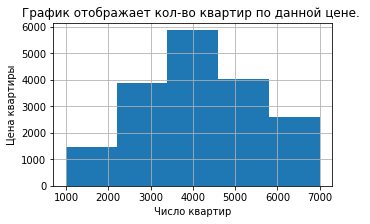

In [67]:
df.plot(y = 'last_price', kind = 'hist', bins = 5, grid=True, figsize = (5,3), range = (1000,7000))
plt.title('График отображает кол-во квартир по данной цене. ')
plt.xlabel('Число квартир')
plt.ylabel('Цена квартиры')
plt.legend().remove()
plt.show()

Рынок представлен в основном квартирами в ценовом диапазоне 3500-4500 тыс. руб.

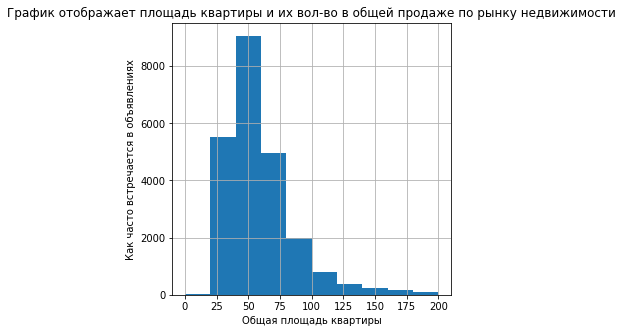

In [68]:
df.plot(y = 'total_area', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (0,200))
plt.title('График отображает площадь квартиры и их вол-во в общей продаже по рынку недвижимости')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Как часто встречается в объявлениях')
plt.legend().remove()
plt.show()

Видим, что самая ходовая квартира по рынку недвижимости имеет общую площадь 45-55 кв. метров.

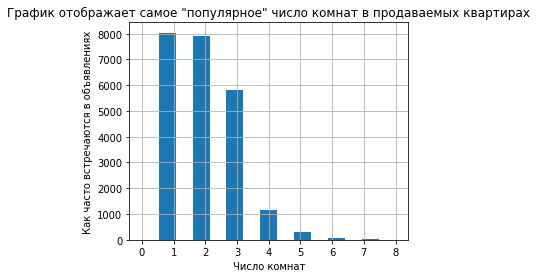

In [69]:
df.plot(y = 'rooms', kind = 'hist', bins = 15, grid=True, figsize = (5,4), range = (0,8))
plt.title('График отображает самое "популярное" число комнат в продаваемых квартирах')
plt.xlabel('Число комнат')
plt.ylabel('Как часто встречаются в объявлениях')
plt.legend().remove()
plt.show()

Однокомнатные и двухкомнтаные квартиры преобладают среди всех продаваемых квартир.

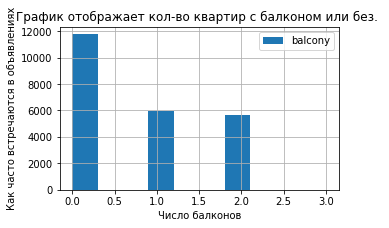

In [70]:
df.plot(y = 'balcony', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0,3))
plt.title('График отображает кол-во квартир с балконом или без. ')
plt.xlabel('Число балконов')
plt.ylabel('Как часто встречаются в объявлениях')
plt.show()

Видим, что квартир без балкона столько же, сколько квартир с одним ли двумя балконами вместе взятыми.

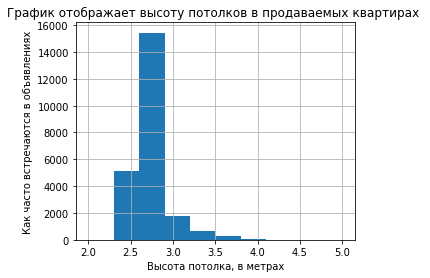

In [71]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (5,4), range = (2,5))
plt.title('График отображает высоту потолков в продаваемых квартирах ')
plt.xlabel('Высота потолка, в метрах')
plt.ylabel('Как часто встречаются в объявлениях')
plt.legend().remove()
plt.show()

Квартры в основном представлены с высотой потолков 2,65-2,7м. 

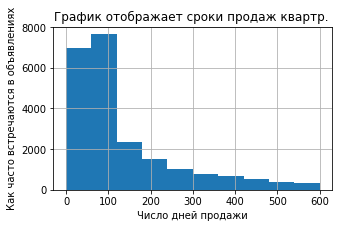

In [72]:
df.plot(y = 'days_exposition', kind = 'hist', grid=True, figsize = (5,3),range = (0,600))
plt.title('График отображает сроки продаж квартр. ')
plt.xlabel('Число дней продажи')
plt.ylabel('Как часто встречаются в объявлениях')
plt.legend().remove()
plt.show()

В среднем продажа квартиры проходит за 80-90 дней.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


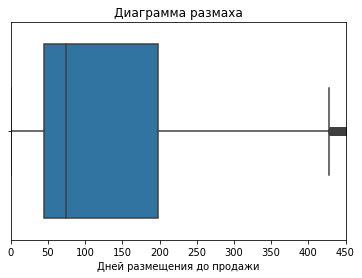

In [73]:
sns.boxplot(df['days_exposition'], color='tab:blue')
plt.title('Диаграмма размаха')
plt.xlabel('Дней размещения до продажи')
plt.xlim(0, 450);

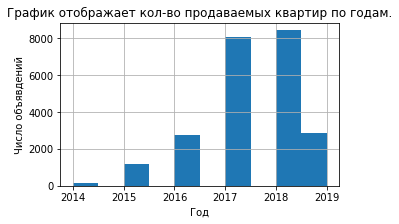

In [74]:
df.plot(y = 'year', kind = 'hist', grid=True, figsize = (5,3))
plt.title('График отображает кол-во продаваемых квартир по годам.')
plt.xlabel('Год')
plt.ylabel('Число объявдений')
plt.legend().remove()
plt.show()

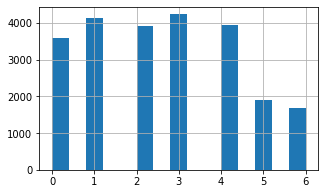

In [75]:
# число объявлений размещаемых в сб. и вск., практически в 2 раза меньше чем в будние дни. 
# выходные на то и выходные ... :)
# максимальная активность в четверг
df['weekday'].hist(bins = 15,figsize = (5,3));

In [76]:
# создадим сводную таблицу из дней недели и средней цены (медианы) стоимости квартиры, 
#проанализируем как может повлиять день недели на цену квартиры
day_price = df.pivot_table(index='weekday', values='last_price', aggfunc=['median','mean'])
day_price.columns = ['median','mean']
day_price.sort_values('median', ascending=False).head(10)

,median,mean
weekday,,
1,4750,6302.749516
2,4700,6299.309931
0,4650,6249.809404
3,4650,6520.762423
4,4600,6154.093893
5,4580,6079.477237
6,4550,6037.549582


наблюдаем изменение средней цены от дня недели. 
В выходные самая низкая средняя цена, разница с началом недели может достигать 200 тыс.руб!

Посмотрим зависимости для месяца и года продажи.

In [77]:
m_price = df.pivot_table(index='month', values='last_price', aggfunc=['median','mean'])
m_price.columns = ['median','mean']
m_price.sort_values('median', ascending=False).head(10)

# здесь уже дельта между макс и мин МЕДИАННОЙ цены почти четверть миллиона, за нее можно и "побороться"!
# апрель - самая высокая цена, август и октябрь - самая низкая

,median,mean
month,,
4,4800,6384.181973
9,4700,6265.581276
11,4700,6349.213918
12,4700,6502.777847
3,4685,6177.074422
2,4650,6252.736600
7,4650,6336.108108
1,4600,6327.804895
8,4600,6379.869186


In [78]:
y_price = df.pivot_table(index='year', values='last_price', aggfunc=['median','mean','count'])
y_price.columns = ['median','mean','count']
y_price.sort_values('median', ascending=False).head(10)

,median,mean,count
year,,,
2014,7580,11817.281481,135
2015,5300,8096.544358,1161
2019,5050,6580.964574,2851
2018,4590,5830.533325,8417
2016,4500,6501.077426,2751
2017,4500,6187.522739,8048


##### Здесь я дополнительно вывел число объявлений размещенных за год, для объективности.
видим, что брать для анализа 2014 год с 135-тью объявлениями не правильно, выборка не презентативна.
Столь низкое число предполагаю связано с тем, что хоть Яндекс недвижимость и появился как сервис 14.12.2010года, но полноценно функционировать стал только  как раз в конце 2014 года. (до 2014 года он только агрегировал информацию с сайтов-классифайдов).

2015год тоже "выкинем", сервис только набирает обороты.
Вцелом видим, что все год от года дорожает, и квартиры не исключение. 

# Резюмируя, можно ... поздравить Яндекс.Недвижимость с прошедшим 11-ти летием! и... Новым Годом! ))))

In [79]:
# Выведем 10 населенных пунктов с наибольшим числом объявлений и медианной ценой кв.м.
count_locality = df.pivot_table(index='locality_name', values='meter_price', aggfunc=['count','median'])
count_locality.columns = ['count','median']
count_locality.sort_values('count', ascending=False).head(10)
# как и ожидалось, кол-во продаж квартир и их цены зазадает Санкт-Петербург.

,count,median
locality_name,,
санкт-петербург,15525,105.0
посёлок мурино,495,84.0
посёлок шушары,436,77.0
всеволожск,392,65.0
пушкин,367,100.0
колпино,337,74.0
посёлок парголово,323,92.0
гатчина,307,67.0
деревня кудрово,283,92.0


In [80]:
# проведем анализ, как изменяется средняя/медиана квартиры по раастоянию от центра.
# все логично, цена метра падает с удалением от центра.
# 42-й и 54 км не рассматриваем, соишком мало продается объектов (4 шт.)

In [81]:
dist_price = df.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=['median','mean','count'])
dist_price.columns = ['median','mean','count']
dist_price.sort_values('median', ascending=False).head(10)

,median,mean,count
cityCenters_nearest,,,
0,11500.0,22512.952381,84
1,10600.0,17777.909871,233
4,9800.0,12338.478555,886
42,9528.5,13289.250000,4
2,9500.0,14664.372093,301
54,9000.0,7978.750000,4
5,8800.0,13355.829071,743
3,8500.0,11368.940039,517
6,8000.0,12936.056645,459


<a id='price_dist'></a>

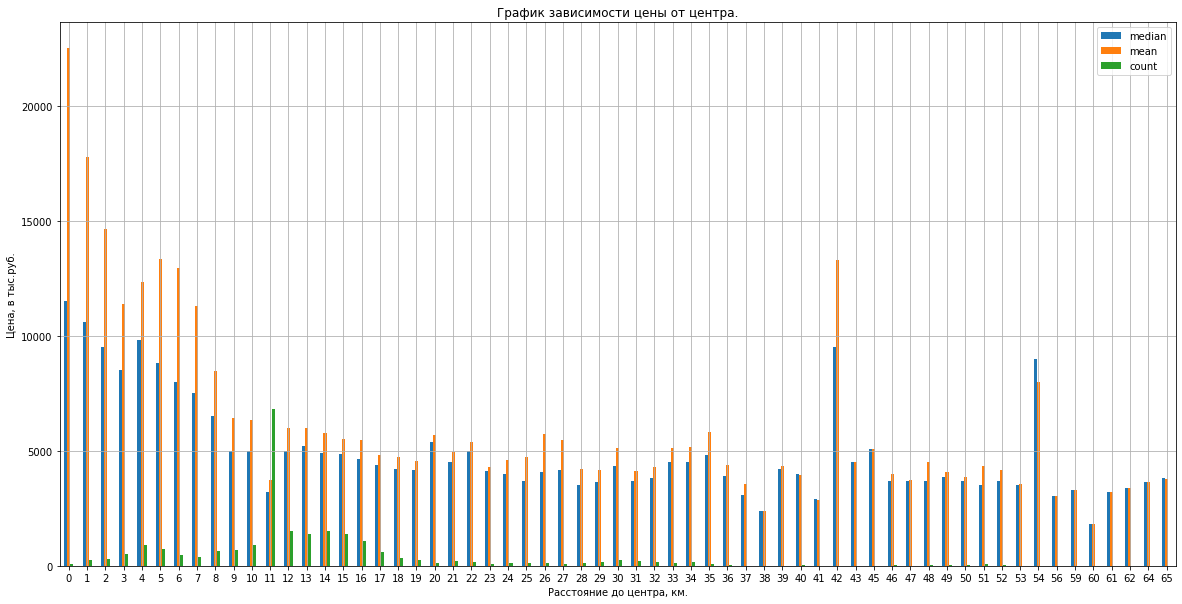

In [82]:
dist_price.plot(kind = 'bar',figsize = (20,10),grid=True);
plt.title('График зависимости цены от центра.')
plt.xlabel('Расстояние до центра, км.')
plt.ylabel('Цена, в тыс.руб.')
plt.xticks(rotation=0);
plt.show()

In [83]:
floor_price = df.pivot_table(index='floor_category', values='last_price', aggfunc=['median','mean','count'])
floor_price.columns = ['median','mean','count']
floor_price.sort_values('median', ascending=False).head(10)

,median,mean,count
floor_category,,,
другой,4850,6532.144410,17111
последний,4300,6265.265755,3364
первый,3900,4732.382271,2888


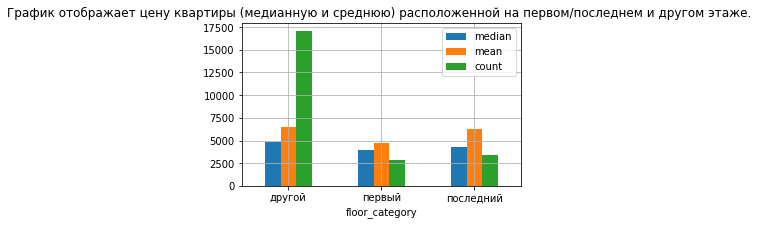

In [84]:
floor_price.plot(kind = 'bar',figsize = (5,3),grid=True);
plt.title('График отображает цену квартиры (медианную и среднюю) расположенной на первом/последнем и другом этаже. ')
plt.xticks(rotation=0); 


Видим, что по рынку, цена квартиры на первом этаже ниже чем на любом другом, средняя цена на последнем и "другом" 
примерно одинаковая.

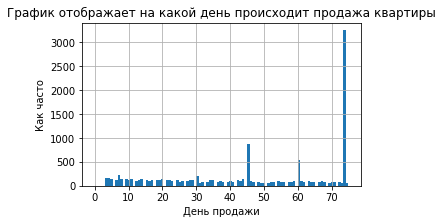

In [85]:
# к выводу выше, о выбросах 45,60,73 дня...
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,75));
plt.title('График отображает на какой день происходит продажа квартиры')
plt.xlabel('День продажи')
plt.ylabel('Как часто')
plt.legend().remove()
plt.show()

В основном продажи идут на 45,60 и 73(75) день. Почему так, ниже будет исследовано.

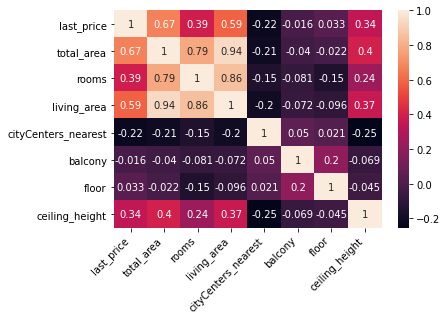

In [86]:
cols = ['last_price', 'total_area', 
        'rooms', 'living_area', 
        'locality_name','cityCenters_nearest',
        'balcony', 'floor','ceiling_height']
sns.heatmap(df[cols].corr(), cbar=True, annot=True);
plt.xticks(rotation=45, ha='right');

# Результат исследования объектов из Санкт-Петербурга и области.




**1. Изучение параметров: площади, цены, числа комнат, высоты потолков, срока продажи квартиры**

Средняя квартира, выставленная на продажу, имеет следующие характеристики:  
это 2х-комнатная квартира площадью 52 кв. м с потолками 2,65 м, вероятность наличия балкона (50/50).
средняя цена продажи такой квартиры 6243тыс.руб. (**медианная** цена 4600тыс.руб. )

Основные отклонения в параметрах квартиры были отсечны на этапе предобработки данных, тем не менее присутствуют
объекты:
- с большой площадью (уместной для отдельного дома), свыше 300 кв.м.
- потолками свыше 3 метров (потолки менее 2.1 метра мы привели к 2.1 т.к. в принципе не бывает квартир с потолками 1 метр)
- по цене более 14 млн.руб.
- срок продажи составил от 198 до 1580 дней

**Срок продажи квартиры. **


Как правило, продажа недвижимости занимала 2.5-3 месяца (медиана = 73 дня). 
Есть отдельные долгие сделки, со сроком более года, но есть и объявления которые "провесели" 1 день.
Все продажи быстрее 45 дней можно считать быстрыми, все продажи свыше 200 дней - долгими.
Но в целом, квартира продается за 2-3 месяца.

(По срокам продаж, есть еще небольшое дополнение-исследование: Есть сроки закрытия - явные лидеры по кол-ву закрытий: 45,60 и 73 дня. Касательно сроков 45 и 60 дней могу предположить, что данные даты обусловлены сроками размещения и продления объявлений, так,  на данный момент, сроки публикации для платного объявления 30 дней, для бесплатного 120 дней.  https://yandex.ru/support/realty/paid.html#paid
Т.е. разместив объявление и не продав квартиру в первом месяце, большая часть объявлений переходит на 2-ой месяц, и вполне может так случиться, что квартира была продана на 45-55-ый день, но с публикации не была снята собственником, и уже на 60-й день она автоматически снялась с продажи.
Срок продажи 73 дня создан несколько искуственно, т.к. были пропуски для более 3000 объектов, и они были заполенны медианой равной 73 дням, что и повлияло на данный выброс.)



**2. Факторы, влияющие на стоимость квартиры**

    Как отметил выше, наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,67).
    Есть конечно зависимость от жилой площади и числа комнат, но эти параметры являются следствием от первого фактора - общей площади. Т.е. нет смысла к ним привязываться. 
    Расстояние до центра города однозначно влияет на стоимость квартиры, но обратно пропорционально, что логично. Дальше от центра, ценник ниже, ближе - выше. Но коэффициент корреляции не так высок как мной ожидалось, всего 0,22.
    Предположу, что квартиры  в историческом центре продаются не так часто как "на окраине", в связи с этим низкое число объектов продажи не способствовало увеличению коэф-та корреляции по данному параметру.
    Ниже я графически вывел эту зависимость (dist_price.plot(kind = 'bar',figsize = (20,10),grid=True)), есть всплески цены на 42 и 54 км, но если копнуть глубже, на данном расстоянии представлено всего по 4-ре объекта, т.е. выборка не презентативна.


    Существенным фактом влияющим на цену квартиры является этаж квартиры, причем если цена за "последний этаж" близка к цене за квартиру на этаже: "не первый не последний", то вот цена квартиры на первом этаже может отличаться от "базы" на 20%. Для медианной цены эта разница 0.9млн, для средней цены уже 1.7млн.!
    
    День недели публикации объявления не играет значимой роли на стоимость. В январе/октябре наблюдается незначительный спад. Если с январем все понятно, глухой сезон, праздники и продавцы вынуждены снижать цены, чтобы срочно продать, то с октябрем не совсем понятно почему... Октябрь это пик деловой активности, а здесь наблюдаем снижение цены... .Возможно как раз из за того, что предложение превышает спрос, и цена несколько снижается. 
    Привязку к годам везти совершенно не правомерно, если только дтя статистики, мол, да, каждый год цена на квартиру растет...
    Неожиданно высокий коэффициент корреляции получил параметр "высота потолков", он выше чем расстояние до центра. Предположу, что это связано с резким ростом стоимости квартир для высоты потолков свыше 3 м., так называемой элитке или исторических квартир в центре с потолками свыше 3-4 метров... 
    

**3. 10 населенных пунктов с наибольшим числом объявлений**


Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, посёлок мурино, Шушары, Всеволожск, Пушкин... Что не удивительно: Мурино, Шушары практически уже пригород Питера, с соответствующей застройкой и объемом жилого фонда.

# Изучим предложения квартир: для локации Санкт-Петербург

In [87]:
#создадим ДФ только с локацией Питер 
spb_df = df.query('locality_name == "санкт-петербург"')
spb_center = spb_df.pivot_table(index='cityCenters_nearest', values=['meter_price', 'last_price','rooms','balcony','ceiling_height'], aggfunc='median')
spb_center.head(5)

,balcony,ceiling_height,last_price,meter_price,rooms
cityCenters_nearest,,,,,
0,0.0,3.00,11500,138.5,3.0
1,0.0,3.00,10600,124.0,3.0
2,0.0,3.05,9500,116.0,3.0
3,0.0,2.91,8500,110.0,3.0
4,0.0,2.90,9800,126.0,3.0


In [88]:
spb_center_count = spb_df.pivot_table(index='cityCenters_nearest', values=['last_price'], aggfunc=['count','median','mean'])
spb_center_count.head(5)

,count,median,mean
,last_price,last_price,last_price
cityCenters_nearest,,,
0,84,11500,22512.952381
1,233,10600,17777.909871
2,301,9500,14664.372093
3,517,8500,11368.940039
4,886,9800,12338.478555


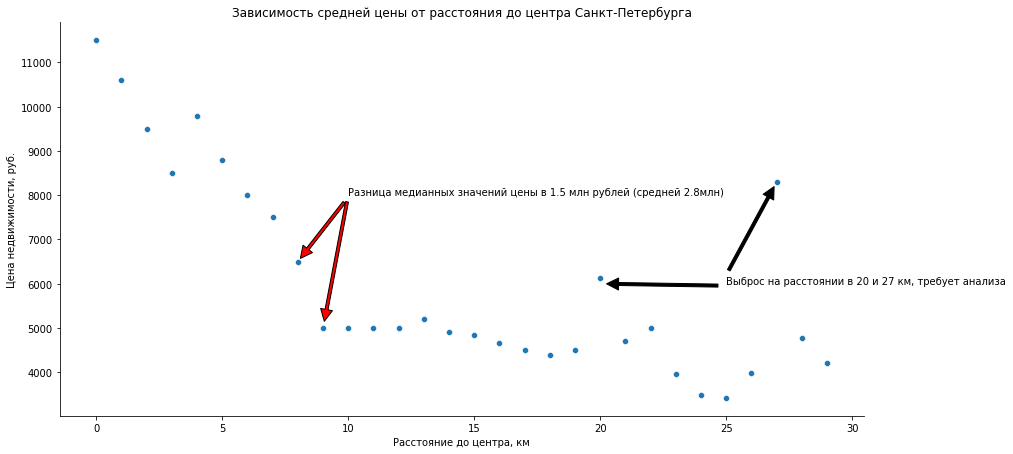

In [89]:
sns.relplot(x=spb_center.index, y='last_price', data=spb_center, height=6, aspect=2)
plt.annotate('Разница медианных значений цены в 1.5 млн рублей (средней 2.8млн)', xy=(8, 6500), xytext=(10, 8000),
            arrowprops=dict(facecolor='red', shrink=0.05,width=3))
plt.annotate('', xy=(9, 5000), xytext=(10, 8000),
            arrowprops=dict(facecolor='red', shrink=0.05, width=3))
plt.annotate('Выброс на расстоянии в 20 и 27 км, требует анализа', xy=(20, 6000), xytext=(25, 6000),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3))
plt.annotate('', xy=(27, 8300), xytext=(25, 6200),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3))
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

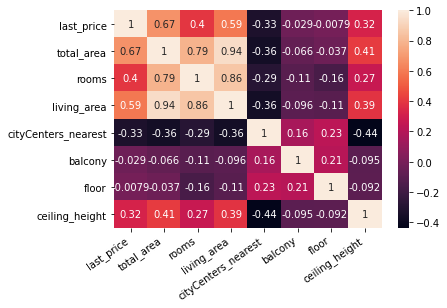

In [90]:
# обновленная тепловая карта
cols = ['last_price', 'total_area', 
        'rooms', 'living_area', 
        'cityCenters_nearest',
        'balcony', 'floor','ceiling_height']
sns.heatmap(spb_df[cols].corr(), cbar=True, annot=True);
plt.xticks(rotation=35, ha='right'); 

In [91]:
floor_price_centr = spb_df.pivot_table(index='floor_category', values='last_price', aggfunc=['median','mean','count'])
floor_price_centr.columns = ['median','mean','count']
floor_price_centr.sort_values('median', ascending=False).head(10)

,median,mean,count
floor_category,,,
другой,5622.5,7746.544296,12010
последний,5550.0,8413.044560,1930
первый,4870.0,6070.285174,1585


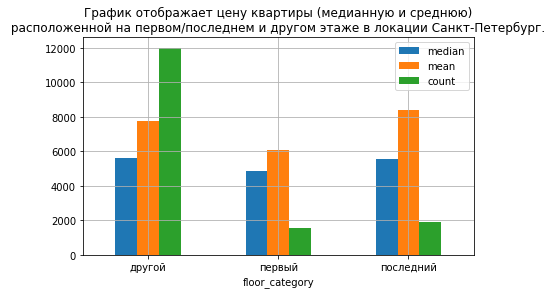

In [92]:
floor_price_centr.plot(kind = 'bar',figsize = (7,4),grid=True);
plt.title('График отображает цену квартиры (медианную и среднюю)\n расположенной на первом/последнем и другом этаже в локации Санкт-Петербург. ')
plt.xticks(rotation=0);

Здесь наблюдается несколько иная картина, не как по рынку в целом. Если стоимость квартиры  на первом этаже все так же ниже чем на любом другом, то вот средняя цена на последнем этаже, несколько выше чем на этаже категории "другой".
Преположительно это связано из за видов открывающихся с последних этажей в центре города и возможности использования пространства крыш/мансард, чем славиться центр Питера.

In [93]:
spb_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday,month,year
count,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000
mean,10.179130,7658.265700,63.089855,2.161739,2.719501,11.376296,36.115040,6.230531,12.008374,0.737842,27.957874,11.125217,0.624477,231.581900,0.764767,263.889469,168.293462,114.206699,2.553366,6.416361,2017.351948
std,5.742896,8683.947619,32.708670,1.066909,0.235931,6.343815,21.376028,4.888923,8.267194,0.831881,12.715908,4.821328,0.784935,342.730313,0.922846,328.115961,212.222662,48.890256,1.781353,3.464349,1.058729
min,0.000000,12.000000,12.000000,1.000000,2.100000,1.000000,2.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2014.000000
25%,6.000000,4200.000000,42.000000,1.000000,2.600000,5.000000,20.000000,3.000000,7.000000,0.000000,18.000000,8.000000,0.000000,0.000000,0.000000,0.000000,47.000000,91.000000,1.000000,3.000000,2017.000000
50%,10.000000,5500.000000,55.000000,2.000000,2.650000,9.000000,31.000000,5.000000,10.000000,0.000000,26.000000,12.000000,0.000000,0.000000,1.000000,39.000000,74.000000,105.000000,2.000000,6.000000,2017.000000
75%,14.000000,8100.000000,74.000000,3.000000,2.750000,16.000000,44.000000,8.000000,14.000000,1.000000,36.000000,14.000000,1.000000,441.000000,1.000000,509.000000,199.000000,124.000000,4.000000,10.000000,2018.000000
max,50.000000,330000.000000,277.000000,9.000000,4.900000,37.000000,220.000000,33.000000,118.000000,2.000000,101.000000,29.000000,3.000000,3190.000000,3.000000,1337.000000,1572.000000,1736.000000,6.000000,12.000000,2019.000000


In [94]:
m_price_spb = spb_df.pivot_table(index='month', values='last_price', aggfunc=['median','mean'])
m_price_spb.columns = ['median','mean']
m_price_spb.sort_values('mean', ascending=False).head(10)
# исследуем зависимость цены продажи от месяца продажи.

,median,mean
month,,
12,5900.0,8153.492218
1,5700.0,7957.556645
4,5589.5,7709.451114
11,5500.0,7702.070922
8,5500.0,7677.388654
2,5500.0,7672.268561
7,5400.0,7650.661362
3,5600.0,7612.229292
9,5600.0,7600.833716


Проведя исследования (см. выше) была определена область, которая относится к центру города, ее радиус составил 8-9 км.


На данном расстоянии, наблюдается резкое снижение стоимости квартиры - 1.5 млн.руб. от медианной цены или 2.8 млн от средней!


(выбросы на 20 и 27 км, можно объяснит тем, что на 20-м км от центра Питера расположены такие нас.пункты как Петергоф, Пушкин... это историко-туристические места с развитой инфраструктурой, и безусловно цены на жилье в них будут выше чем условно на 15-18 км от Питера, в районах промзон. 
Выброс на 27-км не презентативен, на данном растоянии в продаже было всего 2 объекта недвижимости)


Средняя квартиры, в центре Питера имеет следующие хар-ки:
это 2х-комнатная квартира площадью 63 кв. м (против 59кв.м. по рынку в целом) с потолками выше 2.7м. (против 2,69 по рынку), вероятность наличия балкона (50/50).
средняя цена продажи такой квартиры 7.6 млн (против 6.2 млн. по рынку).
Зависимость цены квартиры о расстояния до цента, для данной группы выражено более явно, 0.33 против 0.22 (рост 50%!).
Квартиры на последних этажах имеют более высокую цену, чем не только аналогичные по рынку но и даже чем квартиры в центре Питера на этажах "не первый не последний". Преположительно из за видов открывающихся с них в центре города и возможность использования пространства крыш/мансард, чем славиться центр Питера.

Сроки продажи квартр в центре, практически не отличаются от сроков продаж в целом по рынку, в среднем это 160 дней, пр и медиане 73-74 дня.

## Общий вывод

Стоимость квартиры в Санкт-Птербурге, определется по сути исходя из 2-х основных параметров:
    1. Общая площадь квартиры
    и
    2. Нахождением/или нет  квартиры на расстоянии в радиусе 8-9 км. от центра города.
    Все остальные факторы (число комнат,жилая площадь, высота потолков и т.п., не имеют столь существенного веса как выше озвученные (или имеют но он вытекают из основного фактора, например большая площадь уже подразумевает бОльшую жилую площадь, число комнат..).
    
   Есть еще один фактор который заслуживает внимание: это средняя стоимость квартиры расположенной в радиусе 8-9 км от центра Питера **и находящейся на последнем этаже**. Эта средняя стоимость, **выше** чем для квартир расположенных на этаже - "не первый- не последний" для данной локации.
    Квартиры на первых этажах дешевле аналогичных квартир расположенных на других этажах, в не зависимости от местоположении квартиры.
    Покупку квартиры в центре, желательно планировать на май месяц, а вот квартиры за пределами центра - август. В данные месяца, средняя цена продажи - минимальна.
    

In [95]:
import random
for v in ['!'] + [' '.join(random.choice(['*', '*', '^', '^', '@', '+']) * i) for i in range(1, 20, 1)] \
                                          + ['|', '|', '[___]']:
  print('{:~^37}'.format(v))

~~~~~~~~~~~~~~~~~~!~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~*~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~+ +~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~* * *~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~@ @ @ @~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~* * * * *~~~~~~~~~~~~~~
~~~~~~~~~~~~~@ @ @ @ @ @~~~~~~~~~~~~~
~~~~~~~~~~~~^ ^ ^ ^ ^ ^ ^~~~~~~~~~~~~
~~~~~~~~~~~@ @ @ @ @ @ @ @~~~~~~~~~~~
~~~~~~~~~~* * * * * * * * *~~~~~~~~~~
~~~~~~~~~^ ^ ^ ^ ^ ^ ^ ^ ^ ^~~~~~~~~~
~~~~~~~~^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^~~~~~~~~
~~~~~~~* * * * * * * * * * * *~~~~~~~
~~~~~~+ + + + + + + + + + + + +~~~~~~
~~~~~^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^~~~~~
~~~~^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^~~~~
~~~@ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @~~~
~~^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^~~
~+ + + + + + + + + + + + + + + + + +~
* * * * * * * * * * * * * * * * * * *
~~~~~~~~~~~~~~~~~~|~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~|~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~[___]~~~~~~~~~~~~~~~~


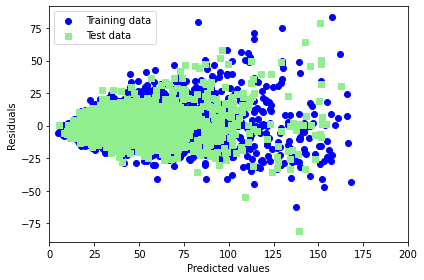

In [96]:
# здесь визиуально оценивал, насколько хорошо обучилась модель (ЛинейнаяРегрессия)

X=df[['total_area']].values 
y= df['living_area'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.scatter(y_train_pred,  y_train_pred - y_train,c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.xlim([0, 200])
plt.tight_layout()
